<a href="https://colab.research.google.com/github/divyanx/ML/blob/main/FMML-Labs/LAB1/Lab1_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



In [92]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import numpy as np
import plotly.express as px
import pandas as pd


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [93]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [94]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'Éléphant de savane d\'Afrique et l\'Éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« Éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'Éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [95]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [96]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [97]:
print(eng1)

thegiraffegiraffaisanafricanartiodactylmammalthetallestlivingterrestrialanimalandthelargestruminantitistraditionallyconsideredtobeonespeciesgiraffacamelopardaliswithninesubspecieshowevertheexistenceofuptonineextantgiraffespecieshasbeendescribedbaseduponresearchintothemitochondrialandnucleardnaaswellasmorphologicalmeasurementsofgiraffasevenotherprehistoricspeciesknownfromfossilsareextinctthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsdistinctivecoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheiroffspringorbachelorherdsof

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [98]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

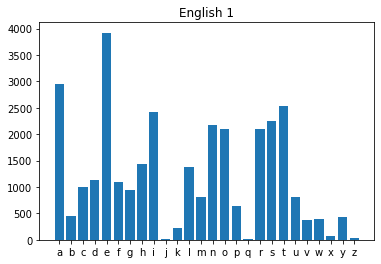

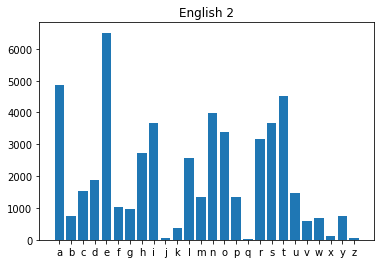

In [99]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

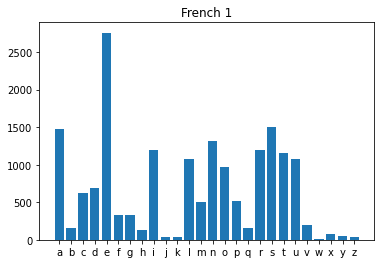

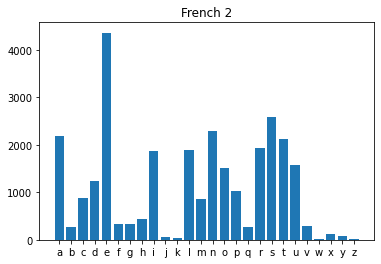

In [100]:
unigram_fr1 = Counter(ngrams(fr1,1))
# plothistogram(unigram_eng1) #misstype
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

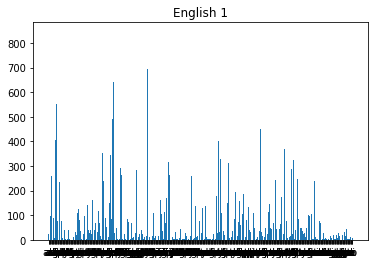

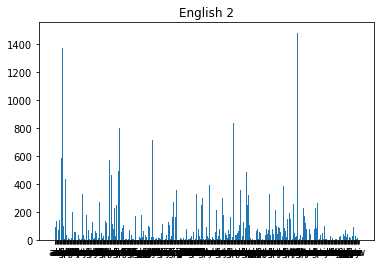

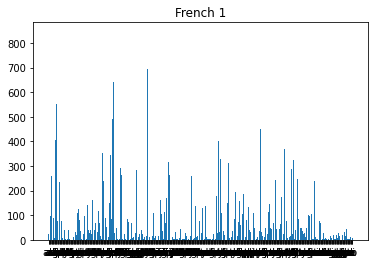

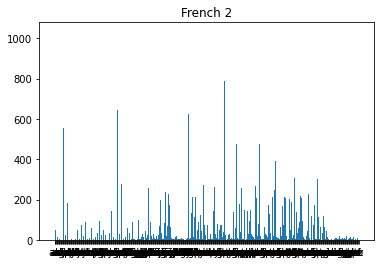

In [101]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [102]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

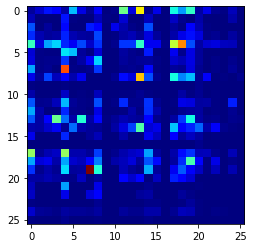

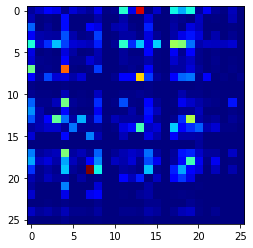

In [103]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

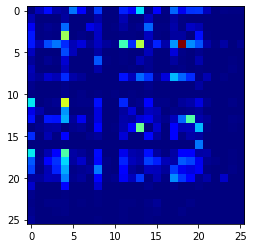

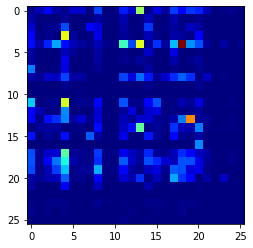

In [104]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [105]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [106]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1367.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 801.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 1028.0
('n', 't') : 786.0
('d', 'e') : 655.0
('e', 'n') : 646.0
('l', 'e') : 623.0
('a', 'n') : 553.0
('o', 'n') : 478.0
('r', 'e') : 477.0
('e', 'l') : 437.0
('s', 'e') : 390.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

--------------------------------------------------------------------------------

### Trying with different language.


In [107]:
wikipedia.set_lang('it')
it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [108]:
it1

'La giraffa (Giraffa Brisson, 1762) è un genere di mammifero artiodattilo africano, nonché l\'animale terrestre vivente più alto ed il più grande ruminante esistente. Tradizionalmente il genere contiene una singola specie, Giraffa camelopardalis, con nove sottospecie. Tuttavia, analisi alternative suggeriscono la presenza di un massimo di otto specie, sulla base di una ricerca sul DNA mitocondriale e nucleare, nonché su misurazioni morfologiche del genere Giraffa. In aggiunta, sono state descritte sette specie estinte conosciute da fossili.\nLe principali caratteristiche distintive delle giraffe sono il collo e le zampe estremamente allungate, gli ossiconi, simili a corna, sul capo, grandi occhi neri con ciglia lunghe e il suo caratteristico mantello a macchie che varia da sottospecie a sottospecie. L\'animale è classificato nella famiglia Giraffidae, insieme al suo parente vivente più prossimo, l\'okapi. La sua distribuzione geografica sparsa si estende dal Ciad a nord, al Sudafrica a

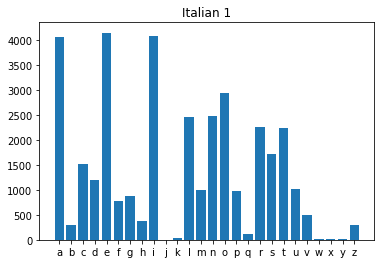

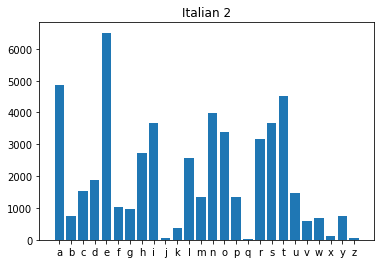

In [109]:
it1 = cleanup(it1)
it2 = cleanup(it2)

unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Italian 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_eng2)
plt.title('Italian 2')
plt.show()

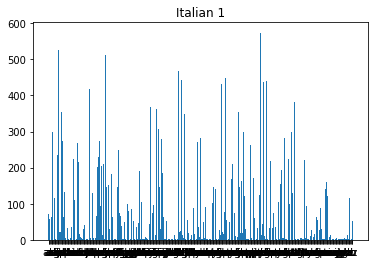

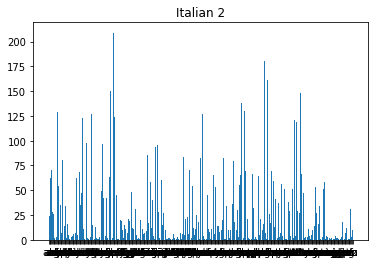

In [110]:
bigram_it1 = Counter(ngrams(it1,2))
plothistogram(bigram_it1)
plt.title('Italian 1')
plt.show()

bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Italian 2')
plt.show()


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1367.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 801.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

Italian 1:
('r', 'a') : 574.0
('o', 'n') : 574.0
('a', 'l') : 565.0
('e', 'n') : 529.0
('a', 'n') : 527.0
('e', 'r') : 525.0
('t', 'e') : 515.0
('e', 'l') : 511.0
('c', 'o') : 479.0
('l', 'a') : 467.0

Italian 2:
('e', 'r') : 209.0
('r', 'e') : 180.0
('a', 'n') : 176.0
('r', 'i') : 161.0
('e', 'n') : 150.0
('t', 'o') : 148.0
('e', 'l') : 142.0
('a', 't') : 142.0
('n', 't') : 140.0
('o', 'n') : 138.0


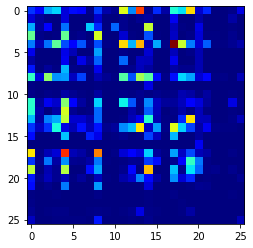

In [111]:
biit1 = plotbihistogram(bigram_it1)
biit2 = plotbihistogram(bigram_it2)
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nItalian 1:')
ShowTopN(biit1)
print('\nItalian 2:')
ShowTopN(biit2)

The bigrams for topic one and topic two are not as similar for italian as they were in case of english and french, so the order of letters in Italian is more topic dependant. 

### Trying with different topic and source.

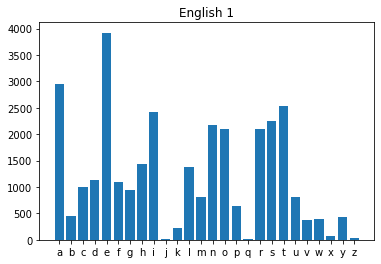

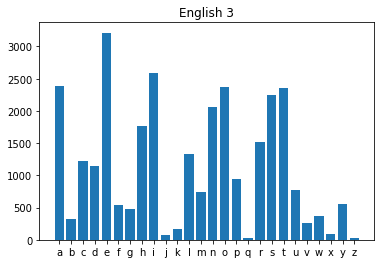

In [112]:
wikipedia.set_lang('en')
topic3 = 'philosophy'
en3 = wikipedia.page(topic3).content
en3 = cleanup(en3)

plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()

unigram_en3 = Counter(ngrams(en3,1))
plothistogram(unigram_en3)
plt.title('English 3')
plt.show()

So for english, even for very different topics the unigrams are quite similar. So we can say that the topic doesnt greatly effect the letter frequencies.

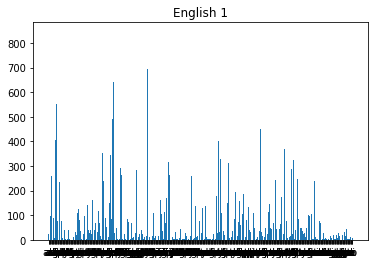

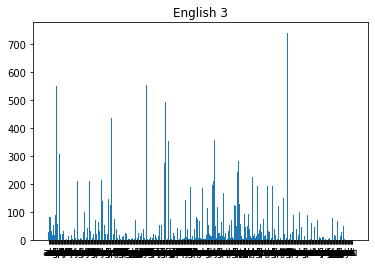

In [113]:
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng3 = Counter(ngrams(en3,2))
plothistogram(bigram_eng3)
plt.title('English 3')
plt.show()


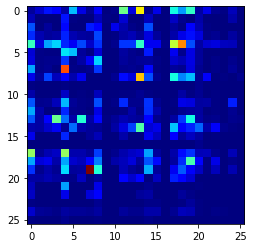

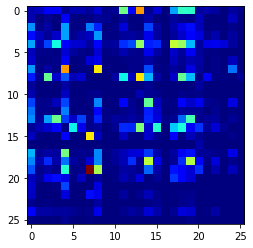

In [114]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng3 = plotbihistogram(bigram_eng3)

In [115]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 3:')
ShowTopN(bieng3)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 3:
('t', 'h') : 740.0
('h', 'e') : 552.0
('a', 'n') : 550.0
('i', 'n') : 492.0
('p', 'h') : 491.0
('h', 'i') : 490.0
('e', 'r') : 436.0
('s', 'o') : 429.0
('s', 't') : 417.0
('t', 'i') : 408.0


So even by changing the topic the bigram frequencies have only varied a little, this might be due to the introduction of context specific words.

In [116]:
! pip install newspaper3k
import nltk
nltk.download('punkt')
from newspaper import Article
url = "https://timesofindia.indiatimes.com/trend-tracking/startups-women-small-towns/articleshow/57096094.cms"
toi_article = Article(url, language="en")
toi_article.download()
toi_article.parse()
#To extract text
text = toi_article.text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


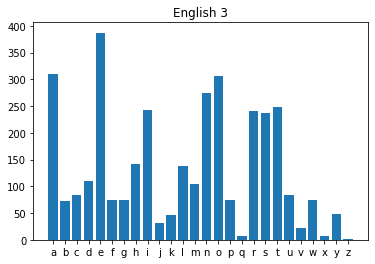

In [117]:
en4 = text
en4 = cleanup(en4)
unigram_en4 = Counter(ngrams(en4,1))
plothistogram(unigram_en4)
plt.title('English 3')
plt.show()

Unigram for the article fro completly different source and of a completely different topic is almost same. Lets see the bigram.

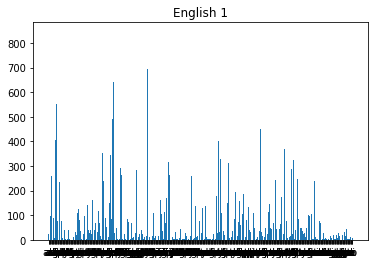

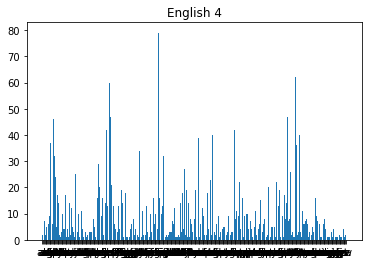

In [118]:
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng4 = Counter(ngrams(en4,2))
plothistogram(bigram_eng4)
plt.title('English 4')
plt.show()


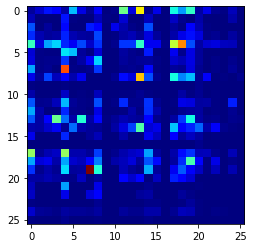

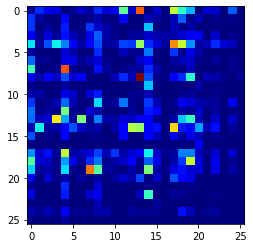

In [119]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng4 = plotbihistogram(bigram_eng4)

In [120]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 4:')
ShowTopN(bieng4)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 4:
('i', 'n') : 79.0
('h', 'e') : 65.0
('a', 'n') : 64.0
('t', 'h') : 62.0
('e', 'r') : 60.0
('o', 'r') : 54.0
('n', 'd') : 52.0
('s', 't') : 47.0
('e', 's') : 47.0
('a', 'r') : 46.0


So after seeing the bigram, it's almost similar, even for this article, which is completly different. So we can here say that the topic or the source is not efffect the unigrams or the bigram.

### How can we use and visualize trigrams and higher n-grams
For visualising 3-grams or heigher n-grams, to be able to plot it in 2D i.e a histogram, we will need all the permutations of the letters, so for 3 it will be 26P3 permutations, this will increase at very hight with n. We can also plot the 2-Dimensional plots used here, we will then divide the n-gram int two halves, and then plot in the 2D plain.

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [121]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



Extract a subset of the data for our experiment:

In [122]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

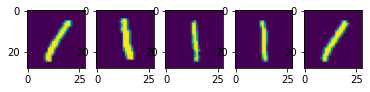

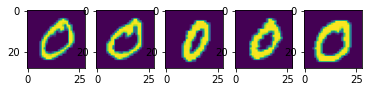

In [123]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [124]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

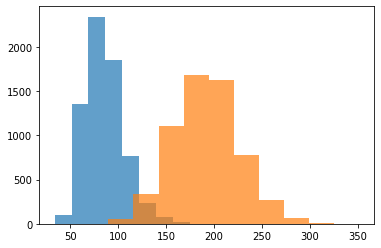

In [125]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [126]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

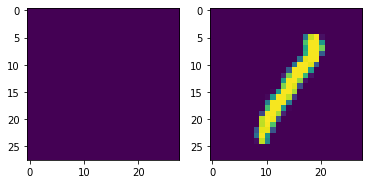

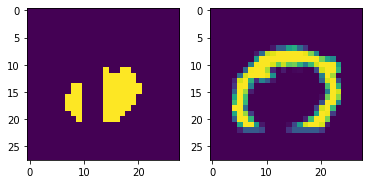

In [127]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

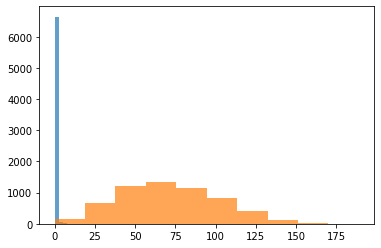

In [128]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:


In [129]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


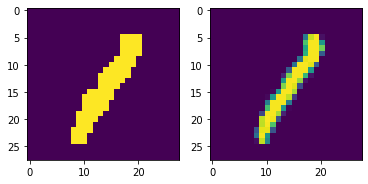

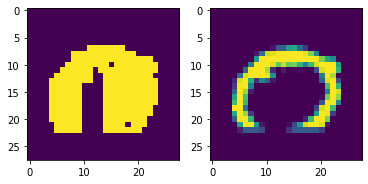

In [130]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

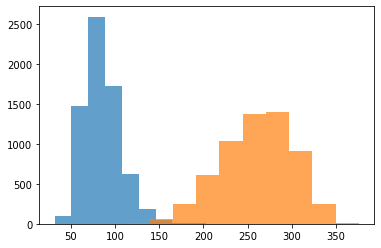

In [131]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [132]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

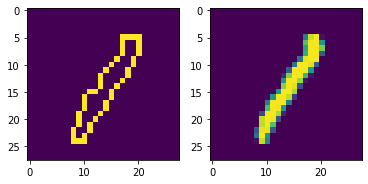

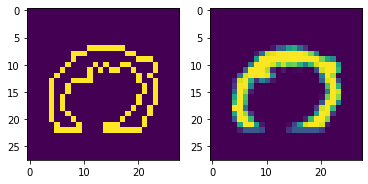

In [133]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

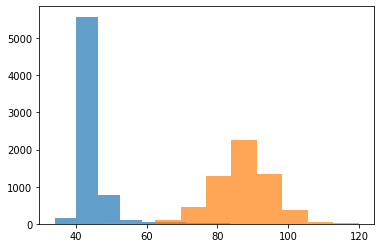

In [134]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

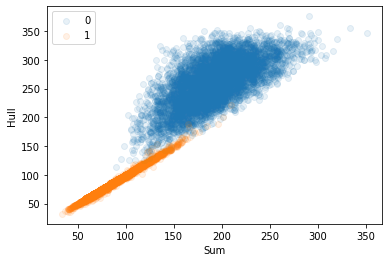

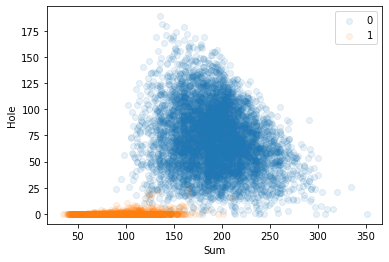

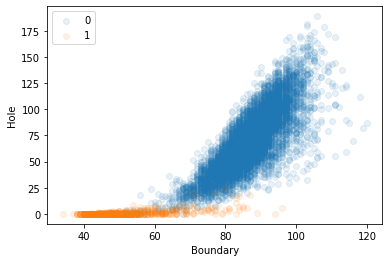

In [135]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [136]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

--------------------------------------------------------------------------------

# 1. Which is the best combination of features?

Now on, we have drawn a histogram only, we need to draw a decision boundary to effectively classify test data.
One way of creating a decision boundary can be to draw a line so that sum of elements belonging to class-left and are present in the left and number of elements to class-right and are present in the right are max.

We can completley leave that class_left, class_right identification beforehand  as well and do twice the computation if we do not have idea about which class is which

The function `decisionBoundaryLR`, takes input two lists which contain features of two classes and gives a decision boundary between those two class. 

It also calculates the score which is a measure of  how many of the sample lies in their respective side of the boundary

In [137]:
def decisionBoundaryLR(class_left, class_right, step=1):
  """
  given features for samples of two classes, returns a decision boundary
  and score of how good that boundary partisions the two classes
  input : 
    class_left : [list of feature values] class whose most of the feature values come to the left
    class_right : [list of feature values] class whose most of the feature values come to the right
  output:
        boundary :  value for the feature, that seperates the two classes best
        score: % age of points that lie on their side of boundary
  """
  leftMost = min(min(class_left), min(class_right))
  rightMost = max(max(class_left), max(class_right))
  curr_boundary = leftMost
  current_score = (len(list(filter(lambda x : x < curr_boundary, class_left))) + \
                 len(list(filter(lambda x : x > curr_boundary, class_right))))/(len(class_left) + len(class_right))
  BestBoundary = curr_boundary
  BestScore = current_score

  boundary = leftMost
  while boundary < rightMost:
    current_score = (len(list(filter(lambda x : x < boundary, class_left))) + \
                 len(list(filter(lambda x : x > boundary, class_right))))/(len(class_left) + len(class_right))
    #print(current_score, BestScore, boundary)
    if current_score > BestScore:
      BestScore = current_score
      BestBoundary = boundary
    boundary += step
  return BestBoundary, BestScore * 100
  


The function `decisionBondary` inputs features for two classes in forms of lists and consider each class as left and right and calls the `decisionBoundaryLR` with both the choices, it returns better of the two boundaries

In [138]:
def decisionBoundary(class1, class2, step = 1):
  """
  calls decisionBoudaryLR by treating each class as class_left and class_right
  also see decisionBoundaryLR

  input: same as decisionBoundaryLR
  returns:
    boundary and score, same as decisionBoundaryLR

  """
  boundaryL1, scoreL1 = decisionBoundaryLR(class1, class2, step)
  boundaryR1, scoreR1  = decisionBoundaryLR(class2, class1, step)
  if scoreL1 > scoreR1:
    return boundaryL1, scoreL1
  else:
    return boundaryR1, scoreR1


### 1. Sum of all pixels.
Find the Decision Boundary for sum, and check the score,

Boundary is sum =  131 , score =  97.11804184761152


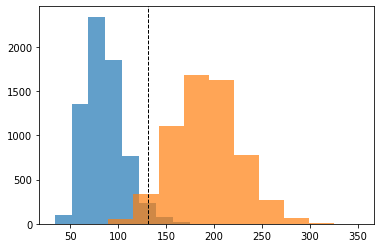

In [139]:
boundary, score = decisionBoundary(sum1, sum0)
print("Boundary is sum = ", boundary, ", score = " ,score)
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)

### 2. Number of Hole Pixels
Finding decision boundary for holes as features

Boundary is holes =  8 , score =  99.46308724832214


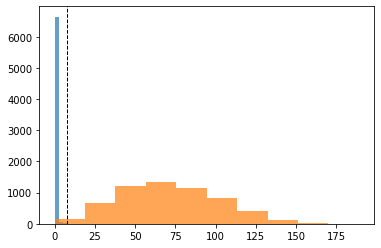

In [140]:
boundary, score = decisionBoundary(hole1, hole0)
print("Boundary is holes = ", boundary, ", score = " ,score)
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)

### 3. Number of Hulls
Find the decision boundary for number of Hulls

Boundary is hull =  156 , score =  99.48677457560206


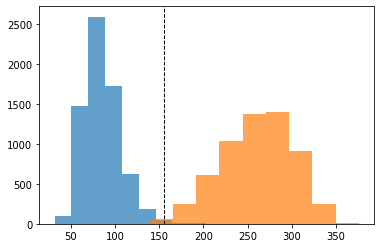

In [141]:
boundary, score = decisionBoundary(hull1, hull0)
print("Boundary is hull = ", boundary, ", score = " ,score)
plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)

### 4. Boundary Pixels
Find decision boundary for number of boundary pixels.

Boundary is bound =  64 , score =  98.99723647848401


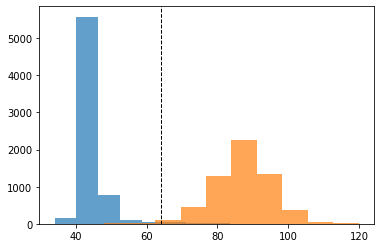

In [142]:
boundary, score = decisionBoundary(bound1, bound0)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)

All the features are very good here, among which hole and hull are the best, but so are other two none the less. We can use combination of any these features. 
**If we have two select any 2, then as distribution of Sum, hulls, and boundary is almost same, so we can select sum and any one of this features.**

# How would you test or visualize four or more features?
Visualising four dimensional data directly is very diffcult unlike 2 or even 3 dimensional, What we can do is take projections of that data on 2 or 1 dimension at a time and plot them seperately, in that way we can see the dependance on each features. But to draw a plot including all the four dimensions seems impossible. I guess, we can yet use some methods for lower dimensions like 4, and for the fourth dimension we can choose other factors like color intensity of the point, or similar. such representations.

# Can you come up with your own features?
### 1. Pixels on a line.
We can find the sum of pixels on a vertical line and take max of it. Then check total number of pixels that constitiute the digit. Then we find out the percentage of pixels that are on a line. We can do this by divide the max value of sum of  optained on a vertical line by total sum of pixels.


In [143]:
def onALine(img):
  """
  finds the sum of pixesl on a vertical line
  returns the max of sums on all possible verticle lines.
  """
  total = 0
  maxSum = 0
  for i in range(len(img)):
    sumOnLine = sum(img[:,i])
    total+=sumOnLine
    maxSum = max(maxSum, sumOnLine)
  return maxSum/total

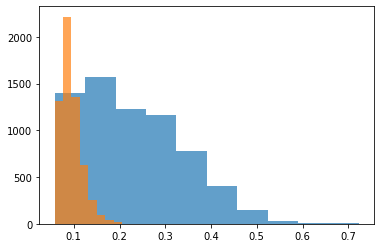

In [144]:
onALine1 = np.array([onALine(i) for i in no1])
onALine0= np.array([onALine(i) for i in no0])
plt.hist(onALine1, alpha=0.7);
plt.hist(onALine0, alpha=0.7);

Clearly this is not a very good featue, as almost all the samples are intersecting no matter in which class they depend.

### 2.  Distance between the leftmost and right most pixel.

In [145]:
def leftMostColoredPixel(img, colored = 10):
  for i in range(len(img)):
    for j in range(len(img)):
      if img[j][i] >= colored:
          return i
  return len(img) + 1

def rightMostColoredPixel(img, colored = 10):
  for i in range(len(img)-1,-1,-1):
    for j in range(len(img)-1,-1,-1):
      if img[j][i] >= colored:
          return i
  return len(img) + 1


Boundary is bound =  13.5 , score =  88.7248322147651


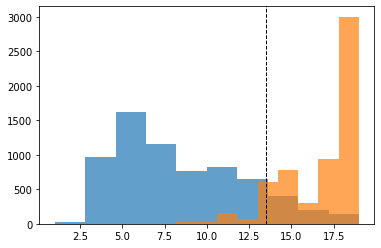

In [146]:
diffLR1 = np.array([rightMostColoredPixel(i) - leftMostColoredPixel(i) for i in no1 ])
diffLR0 = np.array([rightMostColoredPixel(i) - leftMostColoredPixel(i) for i in no0 ])
boundary, score = decisionBoundary(diffLR1, diffLR0, 0.5)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.hist(diffLR1, alpha=0.7);
plt.hist(diffLR0, alpha=0.7);
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)

This feature is very good than the previous man, and is usable, but is not as good as the original features given with the notebook.

###3. Ratio of distance between right most and left most pixel to distance between top most and bottom most pixel

In [147]:
def topMostColoredPixel(img, colored = 10):
  for i in range(len(img)):
    for j in range(len(img)):
      if img[i][j] >= colored:
          return i
  return len(img) + 1

def bottomMostColoredPixel(img, colored = 10):
  for i in range(len(img)-1,-1,-1):
    for j in range(len(img)-1,-1,-1):
      if img[i][j] >= colored:
          return i
  return len(img) + 1


Boundary is bound =  0.6926315789473688 , score =  88.7248322147651


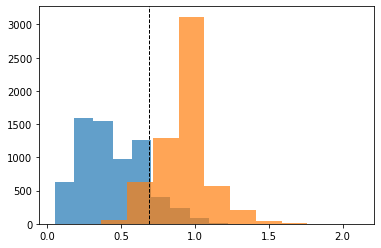

In [148]:
diffTBLR1 = np.array([(rightMostColoredPixel(i) - leftMostColoredPixel(i)) / (bottomMostColoredPixel(i) - topMostColoredPixel(i)) for i in no1 ])
diffTBLR0 = np.array([(rightMostColoredPixel(i) - leftMostColoredPixel(i)) / (bottomMostColoredPixel(i) - topMostColoredPixel(i)) for i in no0 ])
boundary, score = decisionBoundary(diffTBLR1, diffTBLR0, 0.01)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)
plt.hist(diffTBLR1, alpha=0.7);
plt.hist(diffTBLR0, alpha=0.7);

This feature performs similar to previous one, and is also usable, but not very good.

# Will these features work for different classes other than 0 and 1?

The features, might work for other classes as well, this will depend on what aspects of the digit the feature cosniders. For example, the features sum considers the length of the average non overlaping pen strokes, so that might work on other digits as well, but it might also fail for compairing digits such as 6 and 9, or 2, 3 and 5 etc. 
Similarly the Hull and hole considers the loop like parts of the digits, good to classify digits like 1, 2, 3, 5 and 7 vs 0, 6, 8 and 9. 
The actual result can be observed only by extracting it from actual data, because the actual look of digits can varry a lot from idea representations.

### Trying the features on some other digits classification.

In [149]:

no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]
no4 = train_X[train_y==4,:,:]
no5 = train_X[train_y==5,:,:]
no6 = train_X[train_y==6,:,:]
no7 = train_X[train_y==7,:,:]
no8 = train_X[train_y==8,:,:]
no9 = train_X[train_y==9,:,:]

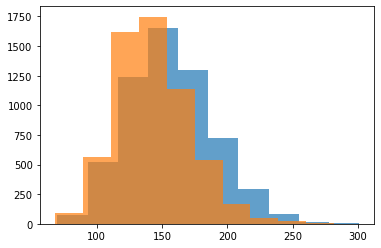

In [150]:
sum6 = np.sum(no6>0, (1,2)) # threshold before adding up
sum9 = np.sum(no9>0, (1,2))

plt.hist(sum6, alpha=0.7);
plt.hist(sum9, alpha=0.7);

The sum feature for 6 and 9, mostly overlaps as the representation of both the digits are very same, most of the features will fail for 6 and 9, which do not vary on orientation.

**One feature that can be good for classification of 6 and 9 can be the ratio of sum of upper half and lower half**

Boundary is bound =  0.9070600576973515 , score =  87.4947332940086


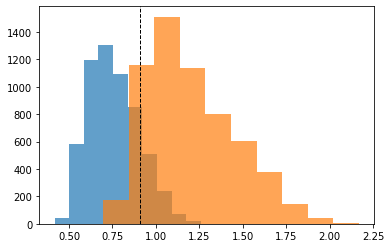

In [151]:
def sumUHalf(img):
  """
  returns sum of upper half of the image
  """
  sum = 0
  for i in range(len(img)//2):
    for j in range(len(img)):
      sum += img[i][j]
  return sum


def sumLHalf(img):
  """
  returns sum of lower half of the image
  """
  sum = 0
  for i in range(len(img)//2 + 1, len(img)):
    for j in range(len(img)):
      sum += img[i][j]
  return sum

sum6UbyL = np.array([sumUHalf(i)/sumLHalf(i) for i in no6 ])
sum9UbyL = np.array([sumUHalf(i)/sumLHalf(i) for i in no9 ])
boundary, score = decisionBoundary(sum6UbyL, sum9UbyL, 0.01)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)
plt.hist(sum6UbyL, alpha=0.7);
plt.hist(sum9UbyL, alpha=0.7);


So the above feature which vary on orienatation change is working bit better for symmetrical cases like 0 and 9.

### What will happen if we take more that two classes at a time?
We can have more than three classes at a time, but in that case, we will need to choose such a feature vector that can classify all the three classes. Suppose we have set of three digits, then it will be very difficult to come up with such a feature which can distinguish them all. For example, say we have 0, 1 and 7, so it seems if we use features as we have used above, then most of them will fail for 1 and 7, then if we take the width feature which i have written they will fail for 0 and 7. So comming up with such as feature seems tough.
If we are able to find a good enough feature, then we can draw decision boundaries between Left Middle and Middle and Rightmost class.

Boundary is bound =  131 , score =  97.11804184761152
Boundary is bound =  164 , score =  78.57985175202157
Boundary is bound =  108 , score =  88.4563864155701


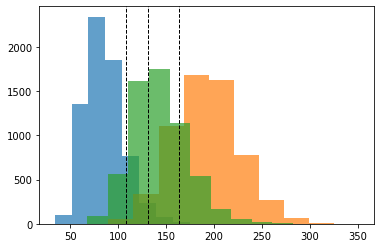

In [152]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum9 = np.sum(no9>0, (1,2))
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum9, alpha=0.7);
boundary, score = decisionBoundary(sum1, sum0)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)
boundary, score = decisionBoundary(sum0, sum9)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)
boundary, score = decisionBoundary(sum1, sum9)
print("Boundary is bound = ", boundary, ", score = " ,score)
plt.axvline(boundary, color='k', linestyle='dashed', linewidth=1)